In [1]:
print('Hello World')

Hello World


In [2]:
import pandas as pd

f4g = pd.read_excel('Final formated DB.xlsx')
f4g.head()

,Patient ID,Time point,Arm,Hospital,Gender,Birthdate,Age,Glucose tolerance,Dyslipidemia,Hypertension,...,IGI 30,Matsuda index,Oral Disposition index,Stumvoll First Phase,Stumvoll Second Phase,OGIS,Unnamed: 94,Unnamed: 95,OGTT Insuline?,OGTT Glucose?
0,F4GE001,M0,inuline,Erasme,female,1965-12-07,50.0,IFG/IGT,Yes,No,...,0.636506,4.17623,2.658194,583.673457,185.057118,347.466202,Yes,Yes,Yes,Yes
1,F4GE002,M0,inuline,Erasme,male,1969-12-13,46.0,Diabetes,No,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,No,No
2,F4GE003,M0,maltodextrine,Erasme,male,1956-09-22,59.0,IFG/IGT,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,Yes,No,No,Yes
3,F4GE004,M0,maltodextrine,Erasme,female,1970-04-09,45.0,NGT,No,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,Yes,No,No,No
4,F4GE005,M0,maltodextrine,Erasme,female,1977-06-04,38.0,Diabetes,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,No,No


In [3]:
f4g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 98 columns):
Patient ID                             306 non-null object
Time point                             306 non-null object
Arm                                    306 non-null object
Hospital                               306 non-null object
Gender                                 298 non-null object
Birthdate                              104 non-null datetime64[ns]
Age                                    298 non-null float64
Glucose tolerance                      294 non-null object
Dyslipidemia                           294 non-null object
Hypertension                           294 non-null object
NAFLD                                  190 non-null object
Bariatric surgery requested            164 non-null object
start week 0                           305 non-null object
end week 12                            305 non-null object
Active smoker                          278 non-null object
I

In [4]:
f4g_clean = f4g.drop(columns=['OGTT Glucose 0' ,'OGTT Glucose 30', 'OGTT Glucose 60', 'OGTT Glucose 90', 'OGTT Glucose 120',
                        'OGTT Insulin -10', 'OGTT Insulin -5', 'OGTT Insulin 0', 'OGTT Insulin 30', 'OGTT Insulin 60',
                        'OGTT Insulin 90', 'OGTT Insulin 120', 'OGTT Insuline', 'OGTT C-pep -10', 'OGTT C-pep -5',
                        'OGTT  C-pep 0', 'OGTT C-pep 30', 'OGTT C-pep 60', 'OGTT C-pep 90', 'OGTT C-pep 120','OGTT Insuline?',
                        'OGTT Glucose?','Masse Maigre', 'Masse Grasse',
                        'Xc/height', 'Fibroscan probe', 'Fibroscan Nb of valid measurements', 'CT L3 muscle area', 'CT L3 visceral fat area',
                        'CT L3 subcut fat area'])

In [5]:
f4g_start = f4g_clean.loc[f4g_clean['Time point']== 'M0']
f4g_start[['Age', 'Weight', 'BMI', 'Average Fasting Glucose', 'Fasting total cholesterol']].describe()

,Age,Weight,BMI,Average Fasting Glucose,Fasting total cholesterol
count,149.000000,146.000000,144.000000,135.000000,143.000000
mean,50.033557,102.427397,36.203981,111.625926,194.524476
std,10.887270,18.977254,5.020409,35.566981,43.932219
min,21.000000,65.400000,30.000000,75.000000,90.000000
25%,43.000000,88.850000,32.674329,91.000000,164.500000
50%,53.000000,99.500000,35.000000,100.000000,191.000000
75%,59.000000,113.450000,38.337470,117.000000,227.000000
max,70.000000,162.400000,56.193772,327.000000,327.000000


In [6]:
import matplotlib.pyplot as plt

f4g_start[['Weight', 'BMI', 'Average Fasting Glucose', 'Average Fasting Insulin', 'AUC Glucose', 'AUC Insuline']].hist(figsize=(10,10))
plt.show()

In [7]:
corr_matrix = f4g_start.corr('spearman')

corr_matrix['HOMA IR'].sort_values(ascending=False)

HOMA IR                                1.000000
Average Fasting Insulin                0.944682
Average Fasting C peptide              0.594693
Fibroscan CAP median                   0.593674
Waist                                  0.500838
Average Fasting Glucose                0.482650
Stumvoll Second Phase                  0.478015
Fasting glycemia                       0.469957
Stumvoll First Phase                   0.459821
Weight                                 0.417955
HbA1c                                  0.385139
W/H ratio                              0.378010
BMI                                    0.335913
gGT                                    0.332016
ALT                                    0.293991
Height                                 0.270313
Fasting triglycerides                  0.252935
AST                                    0.238371
AUC Glucose                            0.237778
Fibroscan elasticity median            0.235311
Hip                                    0

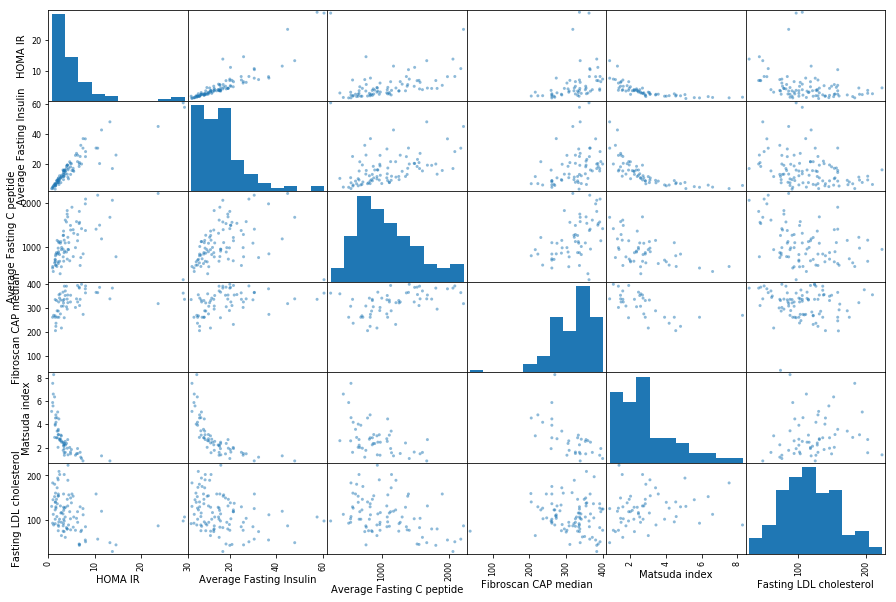

In [8]:
from pandas.plotting import scatter_matrix
attributes = ['HOMA IR', 'Average Fasting Insulin', 'Average Fasting C peptide',
              'Fibroscan CAP median', 'Matsuda index', 'Fasting LDL cholesterol']
scatter_matrix(f4g_start[attributes], figsize=(15,10))
plt.show()

In [9]:
from analysis_script import parallel, swarmbox_m0_m3

f4g = f4g.loc[f4g['Exclusion'] == 'No']

           All M0  Inuline M0  Maltodextrine M0      All M3  Inuline M3  \
count  142.000000   72.000000         70.000000  105.000000   52.000000   
mean   102.288732  101.197917        103.410714  101.017619  100.272115   
std     19.072865   21.440974         16.364762   18.664397   21.252858   
min     65.400000   65.400000         71.200000   63.000000   63.000000   
25%     88.575000   86.425000         91.475000   87.700000   83.450000   

       Maltodextrine M3  Difference  Difference Inu  Difference Malto  
count         53.000000  105.000000       52.000000         53.000000  
mean         101.749057   -1.957619       -2.626923         -1.300943  
std           15.894044    3.526301        3.998964          2.880613  
min           71.700000  -18.500000      -18.500000         -9.200000  
25%           89.500000   -3.700000       -4.075000         -2.900000  


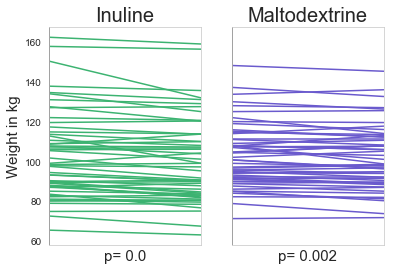

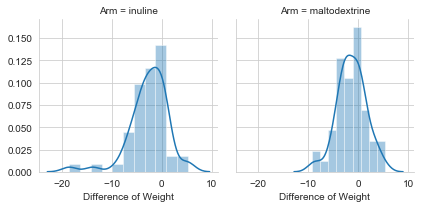

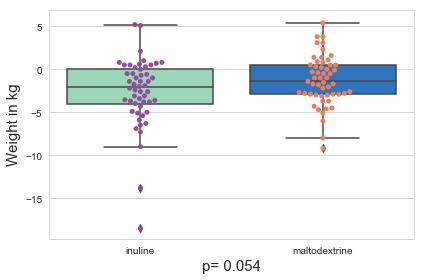

In [10]:
import warnings
warnings.filterwarnings('ignore')

parallel(f4g, 'Weight', save=False)
swarmbox_m0_m3(f4g, 'Weight', save=False)

In [11]:
f4g_start[attributes].corr()

,HOMA IR,Average Fasting Insulin,Average Fasting C peptide,Fibroscan CAP median,Matsuda index,Fasting LDL cholesterol
HOMA IR,1.000000,0.887812,0.356491,0.341195,-0.679742,-0.320130
Average Fasting Insulin,0.887812,1.000000,0.380383,0.356390,-0.701940,-0.335983
Average Fasting C peptide,0.356491,0.380383,1.000000,0.497520,-0.503260,-0.398084
Fibroscan CAP median,0.341195,0.356390,0.497520,1.000000,-0.620915,-0.120924
Matsuda index,-0.679742,-0.701940,-0.503260,-0.620915,1.000000,0.169547
Fasting LDL cholesterol,-0.320130,-0.335983,-0.398084,-0.120924,0.169547,1.000000


In [12]:
import math
from scipy import stats
import numpy as np

In [16]:
def spearman_p_value_DataFrame(df):
    p_value_df = pd.DataFrame(columns = df.columns, index= df.columns)
    corrdf = pd.DataFrame(columns = df.columns, index= df.columns)
    for a in df.columns:
        for b in df.columns:
            _thearray = np.column_stack((df[a].tolist(), df[b].tolist()))
            r , p  = stats.spearmanr(_thearray)
            p_value_df.loc[[a], [b]] = p
            corrdf.loc[[a], [b]] = r
    return p_value_df, corrdf
            
spearman_p_value, corrspearman = spearman_p_value_DataFrame(f4g_start[attributes])
spearman_p_value

,HOMA IR,Average Fasting Insulin,Average Fasting C peptide,Fibroscan CAP median,Matsuda index,Fasting LDL cholesterol
HOMA IR,0,3.45654e-48,2.01651e-15,0.371624,3.16016e-12,0.965341
Average Fasting Insulin,3.45654e-48,0,1.7624e-16,0.479029,3.44745e-07,0.750603
Average Fasting C peptide,2.01651e-15,1.7624e-16,0,0.55139,2.32335e-08,0.238776
Fibroscan CAP median,0.371624,0.479029,0.55139,0,0.0489224,0.00134166
Matsuda index,3.16016e-12,3.44745e-07,2.32335e-08,0.0489224,0,0.45667
Fasting LDL cholesterol,0.965341,0.750603,0.238776,0.00134166,0.45667,0


In [14]:
from statsmodels.stats import multitest

def correct_p_values(df):
    p_value_df = pd.DataFrame(columns = df.columns, index= df.columns)
    _, p, sidak, bf = multitest.multipletests(df.values.flatten(), method='holm')
    counter = 0
    for a in df.columns:
        for b in df.columns:
            p_value_df.loc[[a], [b]] = p[counter]
            counter +=1
    return p_value_df
corelation_corrected = correct_p_values(spearman_p_value)

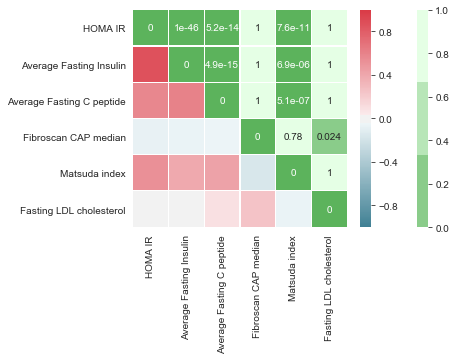

In [61]:
import seaborn as sns
def do_heatmap(df):
    mask = np.zeros_like(df, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(df.values.tolist(), yticklabels=df.columns, xticklabels=df.columns, vmin=-1, vmax=1, center=0,
               cmap=cmap, linewidths=.1, mask = mask)

def revert_map(df):
    cmap = sns.light_palette("green", reverse=True)
    mask = np.zeros_like(df, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    mask = np.invert(mask)
    sns.heatmap(df.values.tolist(), yticklabels=df.columns, xticklabels=df.columns, vmin=0, vmax=1, center=0.00025,
               cmap=cmap, linewidths=.1, annot=True, mask=mask)

revert_map(corelation_corrected)
do_heatmap(corrspearman)